<img src='Exercise4.21.png'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:


P = 760
T = 65

z = dict()
z['component_1'] = 0.0079
z['component_2'] = 0.1321
z['component_3'] = 0.0849
z['component_4'] = 0.269
z['component_5'] = 0.0589
z['component_6'] = 0.1321
z['component_7'] = 1 - sum(z.values())



In [6]:


K = dict()
K['component_1'] = 16.2
K['component_2'] = 5.2
K['component_3'] = 2.6
K['component_4'] = 1.98
K['component_5'] = 0.91
K['component_6'] =  0.72
K['component_7'] =  0.28


print("Pressure     {:6.2f} [mmHg]".format(P))
print("Temperature  {:6.2f} [deg C]".format(T))
print("K-factors:")

for n in K:
    print("   {:s}  {:7.3f}".format(n,K[n]))



Pressure     760.00 [mmHg]
Temperature   65.00 [deg C]
K-factors:
   component_1   16.200
   component_2    5.200
   component_3    2.600
   component_4    1.980
   component_5    0.910
   component_6    0.720
   component_7    0.280


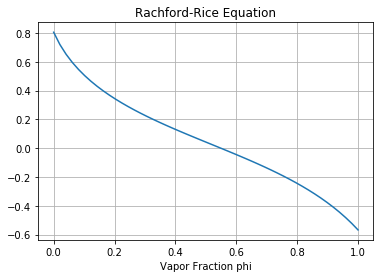

In [7]:
def RR(phi):
    return sum([(K[n]-1)*z[n]/(1 + phi*(K[n]-1)) for n in K.keys()])

phi = np.linspace(0,1)
plt.plot(phi,[RR(phi) for phi in phi])
plt.xlabel('Vapor Fraction phi')
plt.title('Rachford-Rice Equation')
plt.grid();



In [8]:


from scipy.optimize import brentq
 
phi = brentq(RR,0,1)

print("Vapor Fraction  {:6.4f}".format(phi))
print("Liquid Fraction {:6.4f}".format(1-phi))



Vapor Fraction  0.5489
Liquid Fraction 0.4511


In [6]:

x = {n: z[n]/(1 + phi*(K[n]-1)) for n in z}
y = {n: K[n]*z[n]/(1 + phi*(K[n]-1)) for n in z}

print("Component    z[n]    x[n]    y[n]")

for n in z.keys():
    print("{:10s} {:6.4f}  {:6.4f}  {:6.4f}".format(n,z[n],x[n],y[n]))



Component    z[n]    x[n]    y[n]
component_1 0.0079  0.0008  0.0137
component_2 0.1321  0.0400  0.2078
component_3 0.0849  0.0452  0.1175
component_4 0.2690  0.1749  0.3463
component_5 0.0589  0.0620  0.0564
component_6 0.1321  0.1561  0.1124
component_7 0.3151  0.5210  0.1459
